In [12]:
import pandas as pd

df = pd.read_csv('credit_risk_dataset.csv')

# 1. remove age outliers (dropping guys older than 100)
df = df[df['person_age'] <= 100]

# 2. drop employment length outliers (over 100).
# BUT added isna() so we don't accidentally lose the empty values (NaNs).
# this basically means "keep only the ones under 100 or the empty ones".
df = df[(df['person_emp_length'] <= 100) | (df['person_emp_length'].isna())]

# 3. now fill the remaining empty spots (NaNs) with the median
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

print(f"Rows left after cleaning the data: {len(df)}")
print("\nMissing values now:")
print(df.isnull().sum())

Rows left after cleaning the data: 32574

Missing values now:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset & Clean it (The part we discussed earlier)
df = pd.read_csv('credit_risk_dataset.csv')
df = df[df['person_age'] <= 100]
df = df[(df['person_emp_length'] <= 100) | (df['person_emp_length'].isna())]
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# 2. EDA - Plot 1: Relationship between Loan Grade and Default Probability
plt.figure(figsize=(10, 6))
# Finding the percentage of defaults for each loan grade
grade_default = df.groupby('loan_grade')['loan_status'].mean().reset_index()

sns.barplot(x='loan_grade', y='loan_status', data=grade_default, order=sorted(df['loan_grade'].unique()), palette='Reds_d')
plt.title('Default Probability by Loan Grade', fontsize=16, fontweight='bold')
plt.ylabel('Probability of Default (Chance of losing money)')
plt.xlabel('Loan Grade (A = Good, G = Worst)') #A Grade: Very good customer. (Will definitely repay)
#G Grade: Very bad customer. (Will definitely default if given money)
plt.savefig('default_by_grade.png', bbox_inches='tight') # Saving the image
plt.close()

# 3. EDA - Plot 2: Correlation Matrix (Connection between features)
plt.figure(figsize=(12, 8))
# Selecting only numeric columns to check their correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.close()

print("Both graphs saved as PNG successfully!")

/tmp/ipython-input-636/1740858636.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_grade', y='loan_status', data=grade_default, order=sorted(df['loan_grade'].unique()), palette='Reds_d')


Both graphs saved as PNG successfully!


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('credit_risk_dataset.csv')
df = df[df['person_age'] <= 100]
df = df[(df['person_emp_length'] <= 100) | (df['person_emp_length'].isna())]
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df['loan_grade'] = df['loan_grade'].map(grade_mapping)
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)
# ------------------------------------------------------------------------------------------

# Separating Features (X) and Target (y)
# X is the data we use to make decisions. y is the target we want to predict (Loan Default).
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Splitting the data into 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Model
print("Training the model. Please wait...")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Getting predictions for the Test data from the Model (Taking the exam)
y_pred = rf_model.predict(X_test)

# Let's check the results!
print("\n--- Model Exam Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training the model. Please wait...

--- Model Exam Results ---
Accuracy: 93.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5099
           1       0.97      0.74      0.84      1416

    accuracy                           0.94      6515
   macro avg       0.95      0.87      0.90      6515
weighted avg       0.94      0.94      0.93      6515



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('credit_risk_dataset.csv')
df = df[df['person_age'] <= 100]
df = df[(df['person_emp_length'] <= 100) | (df['person_emp_length'].isna())]
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df['loan_grade'] = df['loan_grade'].map(grade_mapping)
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
# ------------------------------------------------------------------------------------------

# Let's take one customer from the Test set and check their details (e.g., the 5th one)
customer = X_test.iloc[[5]]
actual_loan_amount = customer['loan_amnt'].values[0]

# Checking the PROBABILITY instead of just a simple Yes/No
probabilities = rf_model.predict_proba(customer)
default_risk = probabilities[0][1] # Chance of defaulting on the loan (0 to 1)

# EXPECTED LOSS (Measuring the potential financial loss for the company)
expected_loss = default_risk * actual_loan_amount

print("--- AI RISK ENGINE DECISION ---")
print(f"Loan Amount: Rs. {actual_loan_amount:,.2f}")
print(f"Probability of Default (Risk): {default_risk * 100:.1f}%")
print(f"Expected Financial Loss: Rs. {expected_loss:,.2f}")

# DECISION LAYER (Making a decision based on the risk)
print("\n--- FINAL DECISION ---")
if default_risk > 0.60:
    print(" REJECT: High chance of default. Do not approve!")
elif default_risk > 0.30:
    print(" REVIEW: There is a risk. Approve only after a manual check.")
else:
    print(" APPROVE: No issues, will repay. Give the loan.")

--- AI RISK ENGINE DECISION ---
Loan Amount: Rs. 10,800.00
Probability of Default (Risk): 1.0%
Expected Financial Loss: Rs. 108.00

--- FINAL DECISION ---
 APPROVE: No issues, will repay. Give the loan.


Proving the AI's decision. Please wait...


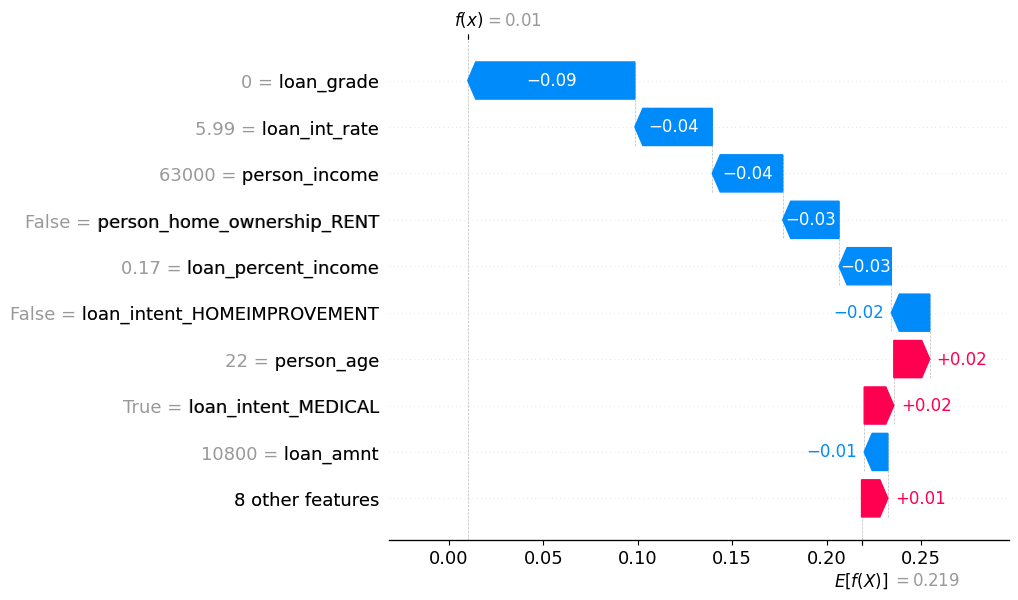

In [16]:
# First we need to install SHAP in Colab #Waterfall plot
!pip install shap

import shap
import matplotlib.pyplot as plt

# Let's take the same 'customer' we used earlier to measure the Risk
# Let's see why the model said to Reject/Review that customer

print("Proving the AI's decision. Please wait...")
explainer = shap.TreeExplainer(rf_model)

# Getting the SHAP values (Reasons) from that customer's data
shap_values = explainer(customer)

# Since it's Random forest, we want the explanation for Class 1 (Defaulting/Risk)
# This gets the 0th row, all features, for the 1st class
shap_explanation = shap_values[0, :, 1]

# Drawing the Waterfall chart (This is the best looking one)
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_explanation)
plt.show()